In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train = pd.read_csv('../input/spaceship-titanic/train.csv')
print(train.shape)
print(train.columns)

(8693, 14)
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')


In [3]:
# 1. 카테고리화가 되는 팩터들은 카테고리화를 하자
# 2. 숫자들은 전부 정규화를 하자
# 3. 결측치를 카테고리화가 되는 피쳐들은 None 값으로 채우고
# 4. 숫자들은 전부 평균값으로 바꾸자

# EDA

In [4]:
# EDA 부분을 좀더 깔끔하게 다듬자

In [5]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
print(train[['HomePlanet','Transported']].groupby(['HomePlanet'], as_index=True).count())
print(train[['HomePlanet','Transported']].groupby(['HomePlanet'], as_index=True).sum())
print(train[['HomePlanet','Transported']].groupby(['HomePlanet'], as_index=True).mean())

            Transported
HomePlanet             
Earth              4602
Europa             2131
Mars               1759
            Transported
HomePlanet             
Earth              1951
Europa             1404
Mars                920
            Transported
HomePlanet             
Earth          0.423946
Europa         0.658846
Mars           0.523024


In [7]:
print(train[['CryoSleep','Transported']].groupby(['CryoSleep'], as_index=True).count())
print(train[['CryoSleep','Transported']].groupby(['CryoSleep'], as_index=True).sum())
print(train[['CryoSleep','Transported']].groupby(['CryoSleep'], as_index=True).mean())

           Transported
CryoSleep             
False             5439
True              3037
           Transported
CryoSleep             
False             1789
True              2483
           Transported
CryoSleep             
False         0.328921
True          0.817583


In [8]:
print(train[['Destination','Transported']].groupby(['Destination'], as_index=True).count())
print(train[['Destination','Transported']].groupby(['Destination'], as_index=True).sum())
print(train[['Destination','Transported']].groupby(['Destination'], as_index=True).mean())
# 출발지 목적지를 합쳐서 feature를 만들 수도 있을것 같다.

               Transported
Destination               
55 Cancri e           1800
PSO J318.5-22          796
TRAPPIST-1e           5915
               Transported
Destination               
55 Cancri e           1098
PSO J318.5-22          401
TRAPPIST-1e           2787
               Transported
Destination               
55 Cancri e       0.610000
PSO J318.5-22     0.503769
TRAPPIST-1e       0.471175


In [9]:
print(train[['VIP','Transported']].groupby(['VIP'], as_index=True).count())
print(train[['VIP','Transported']].groupby(['VIP'], as_index=True).sum())
print(train[['VIP','Transported']].groupby(['VIP'], as_index=True).mean())

       Transported
VIP               
False         8291
True           199
       Transported
VIP               
False         4198
True            76
       Transported
VIP               
False     0.506332
True      0.381910


In [10]:
train.groupby(['HomePlanet'], as_index=True).count()

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
HomePlanet,,,,,,,,,,,,,
Earth,4602,4488,4507,4503,4514,4487,4499,4505,4490,4503,4491,4496,4602
Europa,2131,2073,2070,2094,2085,2089,2095,2085,2078,2086,2094,2085,2131
Mars,1759,1716,1722,1717,1716,1716,1723,1721,1723,1723,1720,1718,1759


In [11]:
# 당연히 null 값들을 어떻게 메꿀것인가
# 출발지 목적지 feature를 만들자
# Name으로 문류를 해보자

In [12]:
train['Name'] = train['Name'].fillna('No Name')

In [13]:
def last_Name(x):
    return x.split()[1]
    
train['last_name'] = train['Name'].apply(lambda x : last_Name(x))

In [14]:
def first_name(x):
    return x.split()[0]

train['first_name'] = train['Name'].apply(lambda x : first_name(x))

In [15]:
print(train[['last_name','Transported']].groupby(['last_name'], as_index=True).mean().sort_values(by=['Transported']).tail(20))

            Transported
last_name              
Slatessen           1.0
Slates              1.0
Disight             1.0
Sophaft             1.0
Gooki               1.0
Craing              1.0
Sionerorly          1.0
Noxiong             1.0
Singmage            1.0
Singlents           1.0
Sinecthex           1.0
Idivent             1.0
Nutca               1.0
Obnoble             1.0
Idalpus             1.0
Icablebat           1.0
Capplid             1.0
Beake               1.0
Siviothy            1.0
Conate              1.0


In [16]:
print(train[train['last_name'] == 'Conate'])

     PassengerId HomePlanet CryoSleep    Cabin  Destination   Age    VIP  \
4071     4348_01     Europa      True  B/142/P  TRAPPIST-1e  47.0   True   
7228     7723_01     Europa      True  B/254/P  TRAPPIST-1e  27.0  False   

      RoomService  FoodCourt  ShoppingMall  Spa  VRDeck           Name  \
4071          0.0        0.0           0.0  0.0     0.0  Krazet Conate   
7228          0.0        0.0           0.0  0.0     0.0  Sheleb Conate   

      Transported last_name first_name  
4071         True    Conate     Krazet  
7228         True    Conate     Sheleb  


In [17]:
train['Passenger_group'] = train['PassengerId'].apply(lambda x : x[:4])

In [18]:
print(train[['Passenger_group','Transported']].groupby(['Passenger_group'], as_index=True).mean())

                 Transported
Passenger_group             
0001                0.000000
0002                1.000000
0003                0.000000
0004                1.000000
0005                1.000000
...                      ...
9275                0.666667
9276                0.000000
9278                0.000000
9279                1.000000
9280                0.500000

[6217 rows x 1 columns]


In [19]:
train['Passenger_group'].unique().shape

(6217,)

In [20]:
train['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [21]:
train.isnull().sum()

PassengerId          0
HomePlanet         201
CryoSleep          217
Cabin              199
Destination        182
Age                179
VIP                203
RoomService        181
FoodCourt          183
ShoppingMall       208
Spa                183
VRDeck             188
Name                 0
Transported          0
last_name            0
first_name           0
Passenger_group      0
dtype: int64

In [22]:
# Cabin을 분해
print(train['Cabin'].iloc[1])

# Cabin null은 N/N/N 으로 채움
train['Cabin'] = train['Cabin'].fillna('N/N/N')

F/0/S


In [23]:
def Dec_split(x):
    return x.split('/')[0]

train['Deck'] = train['Cabin'].apply(lambda x : Dec_split(x))

In [24]:
print(train[['Deck','Transported']].groupby(['Deck'], as_index=True).count())
print(train[['Deck','Transported']].groupby(['Deck'], as_index=True).sum())
print(train[['Deck','Transported']].groupby(['Deck'], as_index=True).mean())

      Transported
Deck             
A             256
B             779
C             747
D             478
E             876
F            2794
G            2559
N             199
T               5
      Transported
Deck             
A             127
B             572
C             508
D             207
E             313
F            1229
G            1321
N             100
T               1
      Transported
Deck             
A        0.496094
B        0.734275
C        0.680054
D        0.433054
E        0.357306
F        0.439871
G        0.516217
N        0.502513
T        0.200000


In [25]:
def Num_split(x):
    return x.split('/')[1]

train['Num'] = train['Cabin'].apply(lambda x : Num_split(x))

In [26]:
def Side_split(x):
    return x.split('/')[2]

train['Side'] = train['Cabin'].apply(lambda x : Side_split(x))

In [27]:
train['Side']

0       P
1       S
2       S
3       S
4       S
       ..
8688    P
8689    S
8690    S
8691    S
8692    S
Name: Side, Length: 8693, dtype: object

In [28]:
print(train[['Side','Transported']].groupby(['Side'], as_index=True).mean())

      Transported
Side             
N        0.502513
P        0.451260
S        0.555037


In [29]:
# 그거에 대한 연결 고리고 차원만 높인다면 딥러닝이 찾아줄것 같은데

In [30]:
print(train[['VIP','VRDeck']].groupby(['VIP'], as_index=True).mean())

            VRDeck
VIP               
False   282.718056
True   1234.856410


In [31]:
Room_service = train['RoomService'].to_numpy()

In [32]:
Room_service = np.log(Room_service)

In [33]:
result = np.isfinite(Room_service)

In [34]:
Room_service = Room_service[result]
print(Room_service)

[4.69134788 3.76120012 5.71373281 ... 4.4543473  0.         4.83628191]


In [35]:
R_min = Room_service.min()

In [36]:
R_max = Room_service.max()

In [37]:
arr1 = np.clip(Room_service,R_min,R_max)

In [38]:
RS = pd.Series(arr1)

<AxesSubplot:>

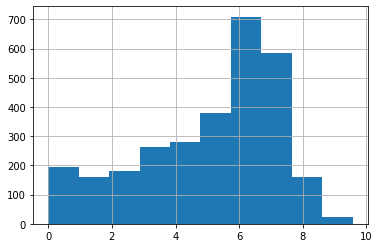

In [39]:
RS.hist()

# train

In [40]:
corr_df = train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Transported']]

In [41]:
corr_df.corr()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
RoomService,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


# Preprocessing

In [42]:
# Make a full set of dataset
train = pd.read_csv('../input/spaceship-titanic/train.csv')
test = pd.read_csv('../input/spaceship-titanic/test.csv')

# Check the shape of train and test
print(train.shape, test.shape)

# Concat train_set without labels and test_set
Full_set = pd.concat([train.iloc[:,:-1],test])

(8693, 14) (4277, 13)


In [43]:
# Drop useless columns
Full_set = Full_set.drop(['PassengerId','Name'],axis=1)

# Split Numerical columns and Categorical value
Numerical_set = Full_set[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
Categorical_set = Full_set[['HomePlanet','CryoSleep','Cabin','Destination','VIP']]

In [44]:
# Fill NaN values of numerical columns with mean value
# Next Step : Check if result is better or not when columns are applied with other values(Ex. median, max, min) 
# Next Step : Check if result is better or not when columns are applied with other Regression algorithm(Ex. linear regression, Randomforest Regression)

from sklearn.impute import SimpleImputer

# Before preprocessing
print("Before fill with mean values : ", Numerical_set.isnull().sum())

# Fill Nan values with mean
imputer = SimpleImputer(strategy='mean')
imputer.fit(Numerical_set)
Numerical_set = imputer.transform(Numerical_set)
Numerical_set = pd.DataFrame(Numerical_set, columns=['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'])

# After preprocessing
print("After fill with mean values : ", Numerical_set.isnull().sum())

Before fill with mean values :  Age             270
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
dtype: int64
After fill with mean values :  Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

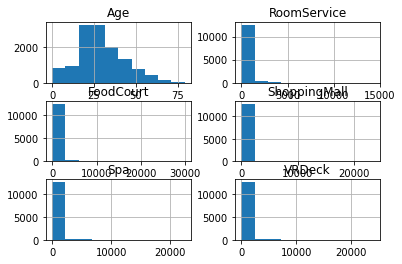

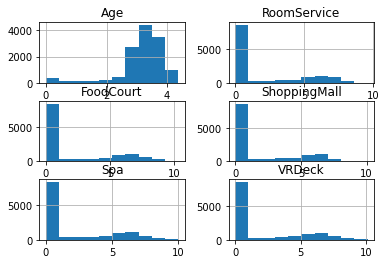

In [45]:
# Hist before applied np.log
Numerical_set.hist()

# Appling np.log to normalize distribution of data
Numerical_set = np.log(Numerical_set)
Numerical_set = np.clip(Numerical_set,1e-10,None)

# Hist After applied np.log
Numerical_set.hist()

In [46]:
# Scaling the values with Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Numerical_set)
Numerical_set = scaler.transform(Numerical_set)
Numerical_set = pd.DataFrame(Numerical_set, columns=['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'])

In [47]:
# Describe Numerical set. Numerical preprocessing has done
Numerical_set.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,1.297000e+04,1.297000e+04,1.297000e+04,1.297000e+04,1.297000e+04,1.297000e+04
mean,2.978171e-16,1.220989e-16,1.005278e-16,1.216195e-16,1.131280e-16,7.340997e-17
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-4.075221e+00,-6.626429e-01,-6.754107e-01,-6.504096e-01,-6.866517e-01,-6.570096e-01
25%,-2.199844e-01,-6.626429e-01,-6.754107e-01,-6.504096e-01,-6.866517e-01,-6.570096e-01
50%,1.662231e-01,-6.626429e-01,-6.754107e-01,-6.504096e-01,-6.866517e-01,-6.570096e-01
75%,5.717039e-01,9.185770e-01,9.441487e-01,8.183098e-01,9.003627e-01,8.336377e-01
max,1.547863e+00,2.800522e+00,2.774726e+00,3.188872e+00,2.873072e+00,2.959976e+00


In [48]:
# Check the NaN values of Categorical set
print(Categorical_set.isnull().sum())

# Fill Cabin column with N/N/N
Categorical_set['Cabin'] = Categorical_set['Cabin'].fillna('N/N/N')

# Fill NaN value with NV string which means Not a Value
Categorical_set = Categorical_set.fillna('NotValue')

print(Categorical_set.isnull().sum())

HomePlanet     288
CryoSleep      310
Cabin          299
Destination    274
VIP            296
dtype: int64
HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
VIP            0
dtype: int64


In [49]:
# Split Cabin column
def Deck(x):
    return x.split('/')[0]

def Side(x):
    return x.split('/')[2]

Categorical_set['Deck'] = Categorical_set['Cabin'].apply(lambda x : Deck(x))
Categorical_set['Sdie'] = Categorical_set['Cabin'].apply(lambda x : Side(x))

# Drop Original Cabin
Categorical_set = Categorical_set.drop(['Cabin'],axis=1)

In [50]:
# One-Hot encoding categorical value
Categorical_set = pd.get_dummies(Categorical_set)

In [51]:
# Concat Numerical_set and Categorical_set
Total_set = pd.concat([Numerical_set.reset_index(), Categorical_set.reset_index()],axis=1)
Total_set = Total_set.drop(['index'],axis=1)

In [52]:
Total_set

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_NotValue,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T,Sdie_N,Sdie_P,Sdie_S
0,0.639452,-0.662643,-0.675411,-0.650410,-0.686652,-0.657010,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.014647,1.035067,0.060389,0.577498,1.555007,0.699338,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.150202,0.698464,2.064553,-0.650410,2.444834,0.737916,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.424468,-0.662643,1.721289,1.606450,2.195487,1.229270,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.507150,1.405048,0.747312,1.263537,1.565216,-0.408568,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0.462886,-0.662643,-0.675411,-0.650410,-0.686652,-0.657010,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
12966,0.734822,-0.662643,1.582230,0.430379,0.131600,1.124295,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
12967,0.248025,-0.662643,-0.675411,-0.650410,-0.686652,-0.657010,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
12968,0.248025,-0.662643,1.967965,-0.650410,-0.686652,1.586580,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


# DNN

In [53]:
# Split train set and test set again
train_set = Total_set.iloc[:8693,:]
test_set = Total_set.iloc[8693:,:]

# labeling train set
label = pd.read_csv('../input/spaceship-titanic/train.csv')
label = label.iloc[:,-1].astype(int)

In [54]:
# Split train set and validate set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_set, label, test_size=0.2)

In [55]:
# DNN model
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras import metrics

In [56]:
# flush model
tf.keras.backend.clear_session()

# Sequential Model
model = Sequential()
model.add(Dense(64, activation='relu',input_shape=(32,)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Adma optimizer not working... 
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics =['accuracy'])

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 4,225
Trainable params: 4,225
Non-trainable params: 0
_________________________________________________________________


2022-06-01 04:13:49.981362: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [57]:
# Fit modle
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test,y_test),verbose=1)

2022-06-01 04:13:50.535503: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
218/218 [==============================] - 2s 4ms/step - loss: 0.5960 - accuracy: 0.6867 - val_loss: 0.5020 - val_accuracy: 0.7711
Epoch 2/30
218/218 [==============================] - 1s 3ms/step - loss: 0.5200 - accuracy: 0.7494 - val_loss: 0.4703 - val_accuracy: 0.7792
Epoch 3/30
218/218 [==============================] - 1s 3ms/step - loss: 0.4925 - accuracy: 0.7683 - val_loss: 0.4635 - val_accuracy: 0.7775
Epoch 4/30
218/218 [==============================] - 1s 3ms/step - loss: 0.4863 - accuracy: 0.7682 - val_loss: 0.4572 - val_accuracy: 0.7815
Epoch 5/30
218/218 [==============================] - 1s 3ms/step - loss: 0.4725 - accuracy: 0.7771 - val_loss: 0.4534 - val_accuracy: 0.7815
Epoch 6/30
218/218 [==============================] - 1s 3ms/step - loss: 0.4742 - accuracy: 0.7800 - val_loss: 0.4541 - val_accuracy: 0.7844
Epoch 7/30
218/218 [==============================] - 1s 3ms/step - loss: 0.4656 - accuracy: 0.7798 - val_loss: 0.4496 - val_accuracy: 0.7792
Epoch 

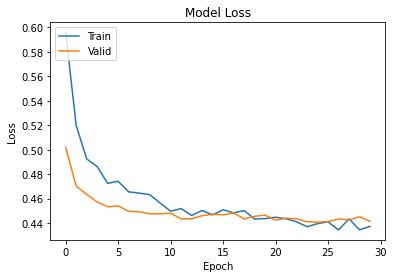

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

In [59]:
result = model.predict(test_set)
result = np.where(result > 0.5, True, False)

In [60]:
submission = pd.read_csv('../input/spaceship-titanic/sample_submission.csv')

In [61]:
submission['Transported'] = result

In [62]:
submission.to_csv('./submission.csv',index=False)